In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#For the linnear regression models
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import math
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce 

In [3]:
df= pd.read_csv('/Users/inesmarina/Desktop/machine_learning_proyect3/CAR DETAILS FROM CAR DEKHO.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
df.head(0)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner


In [6]:
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [7]:
fuel_type=df['fuel'].unique()
print(fuel_type)

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']


In [8]:
transmission_type= df['transmission'].unique()
print(transmission_type)

['Manual' 'Automatic']


In [9]:
ownership=df['owner'].unique()
print(ownership)

['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [10]:
kms=df['km_driven'].unique()
print(kms)

[ 70000  50000 100000  46000 141000 125000  25000  60000  78000  35000
  24000   5000  33000  28000  59000   4500 175900  14500  15000  33800
 130400  80000  10000 119000  75800  40000  74000  64000 120000  79000
  18500  10200  29000  90000  73300  92000  66764 350000 230000  31000
  39000 166000 110000  54000  63000  76000  11958  20000   9000   6500
  58000  62200  34000  53000  49000  63500   9800  13000  21000  29173
  48000  30000  87000  16000  79350  81000   3600  14272  49213  57000
   3240 114000  53772 140000 175000  36000 155500  23000  22155  78380
 150000  80362  55000   1136  43000   2650 115962  65000  56000 213000
 139000 160000 163000  32000  52000  11240  66000  26500  72000  44000
 130000 195000 155000   4000  41000  10832  14681  51000 200000  19600
  46730  21170 167223 141440 212814  88635 149674   8000  68000  38000
  75000  98000  81925  82080  97000  52047  62009  33100 220000  45000
 180000  22000  80577 127500  40903  22288  61690  64484  75976  85962
  5703

In [11]:
df['km_driven'].value_counts()

km_driven
70000     236
80000     228
50000     222
120000    220
60000     215
         ... 
19107       1
32077       1
6480        1
118400      1
112198      1
Name: count, Length: 770, dtype: int64

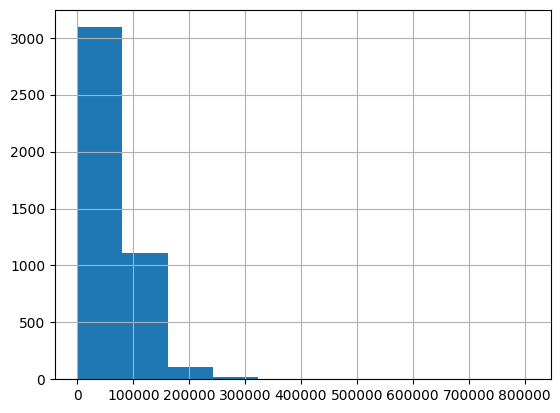

In [12]:
df['km_driven'].hist()
plt.show()

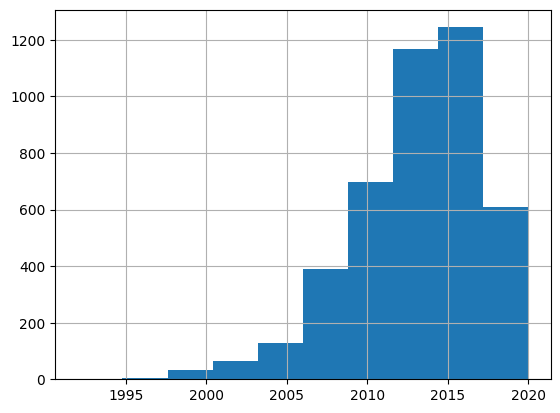

In [13]:
df['year'].hist()
plt.show()

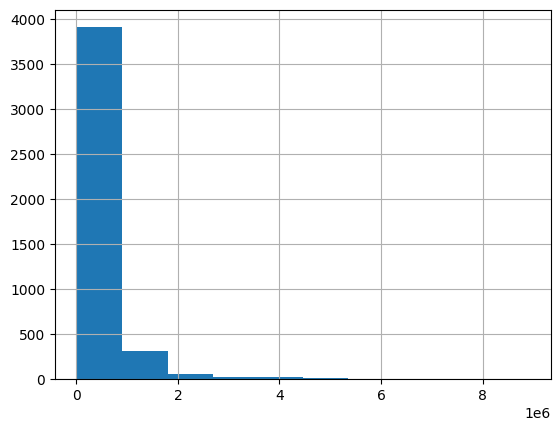

In [14]:
df['selling_price'].hist()
plt.show()

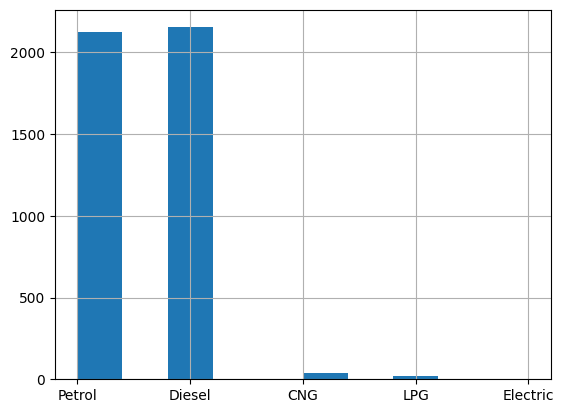

In [15]:
df['fuel'].hist()
plt.show()

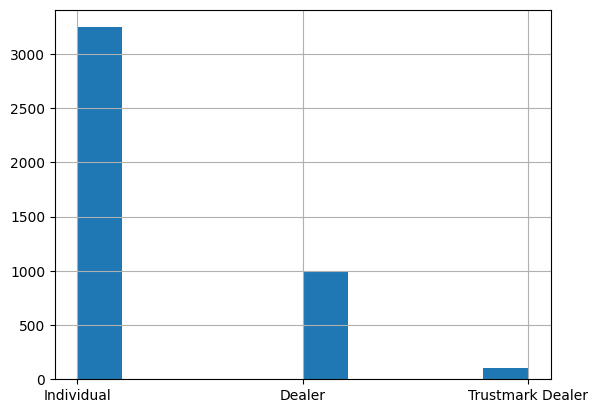

In [16]:
df['seller_type'].hist()
plt.show()

In [17]:
#cathegorical transformation
#year from (latest year of the dataset) count how old the car is (ie. 2020)
#dummie tranformation (transmission)
#other categorical variables can be transformed to dummies: fuel (not many cars are electric or gas based), seller type (trustmark Dealer)

In [18]:
#categorical transformation for bias data -> by doing this we will flatten the data in order to have a more accurate prediction model
#1 km_driven is biased-> Data nearly between 0 - 200 000 kms 

df['log_km_driven'] = np.log(df['km_driven'] + 1)

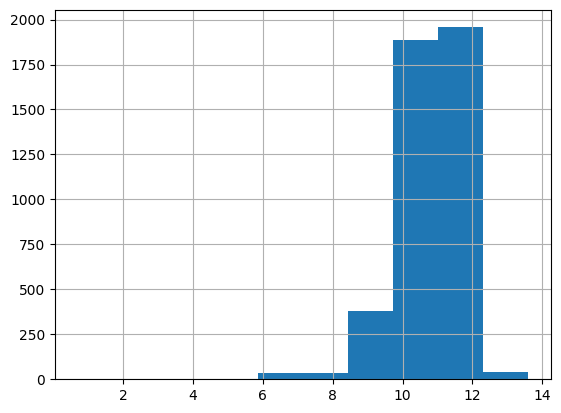

In [19]:
df['log_km_driven'].hist()
plt.show()

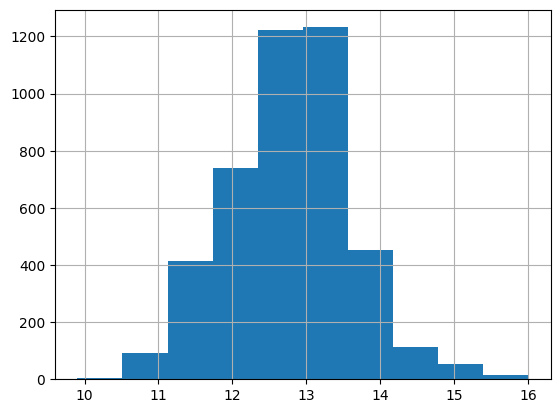

In [20]:
#categorical transformation 
#2 selling_price is biased-> Data nearly between 0 - 200 000 kms 

df['log_selling_price'] = np.log(df['selling_price'] + 1)
df['log_selling_price'].hist()
plt.show()

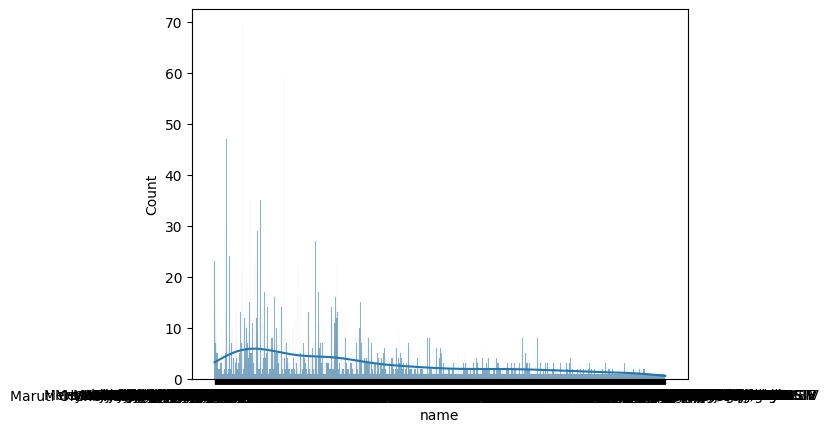

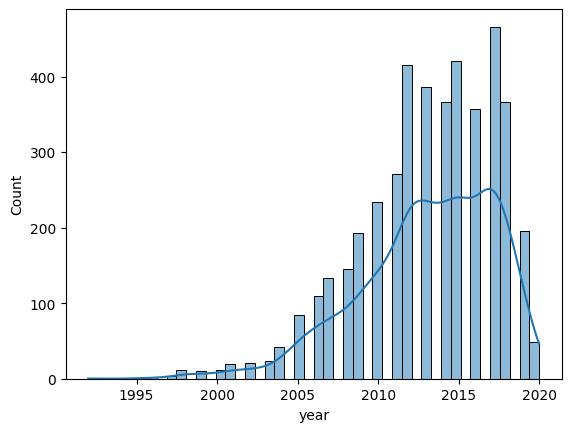

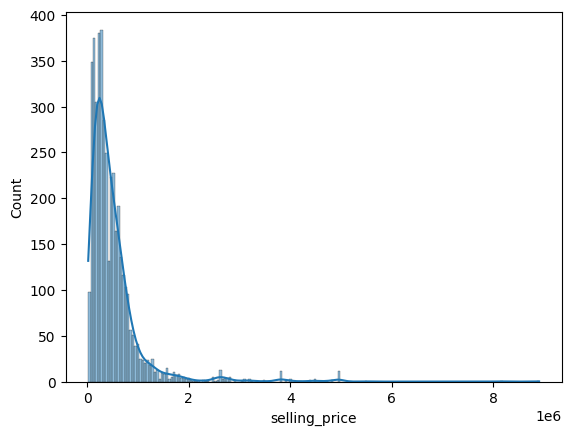

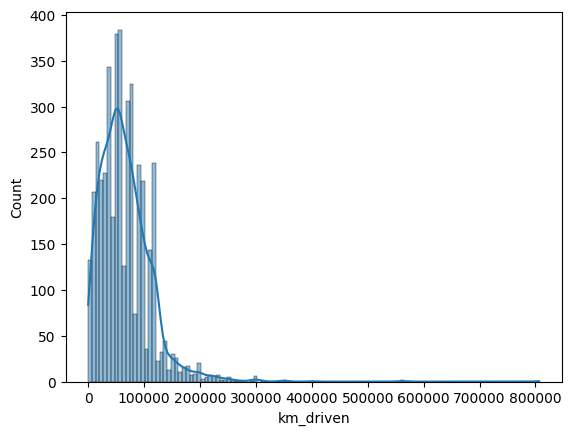

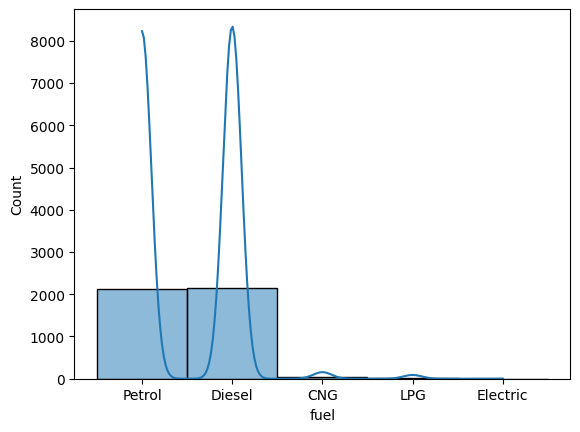

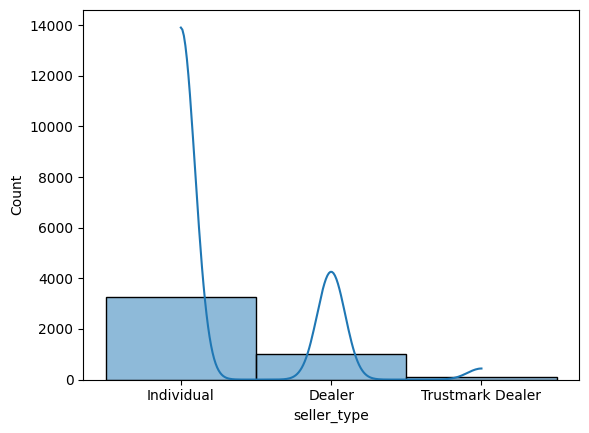

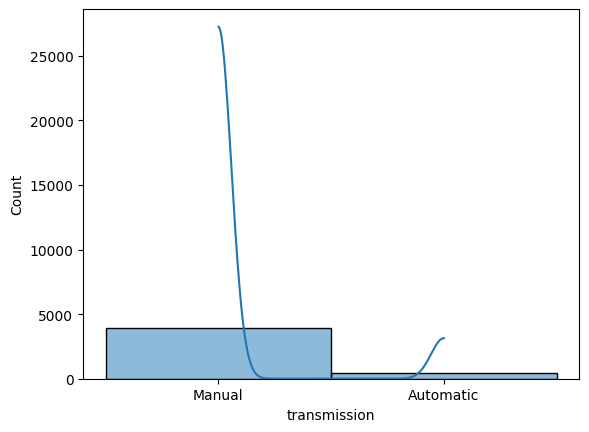

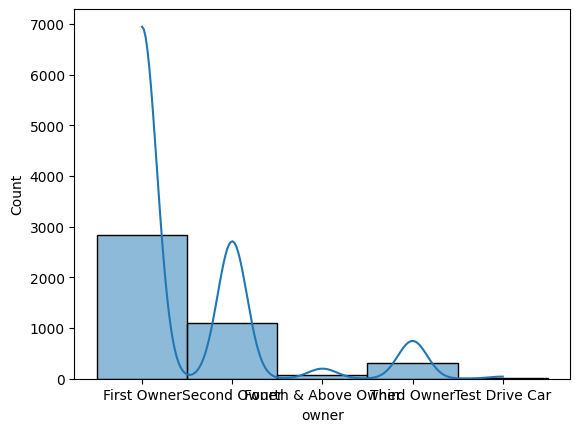

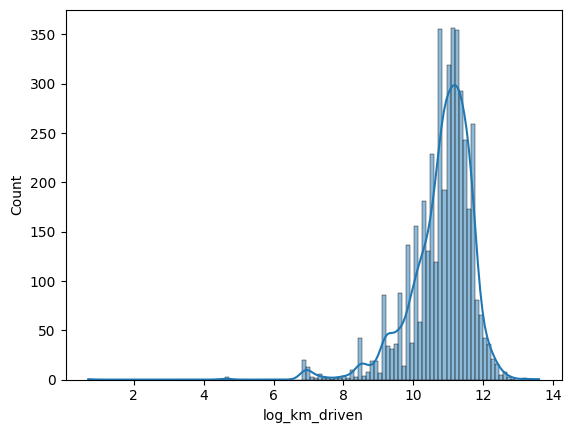

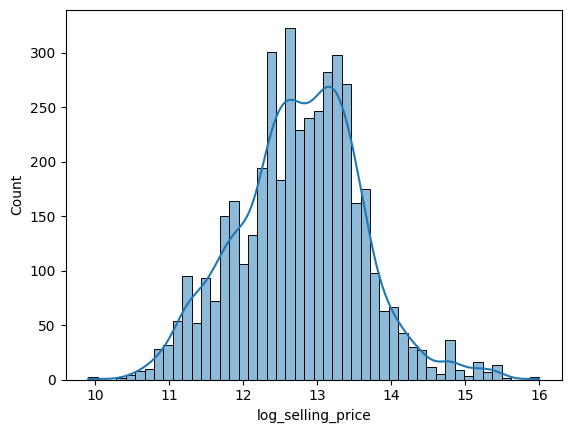

In [21]:
for column in df.columns:
    sns.histplot(df[column], kde=True)
    plt.show()

In [22]:
#I can see there are still outliers after the logaritmical transformation so I will use IQR=InterQuantile Range

iqr=np.percentile(df['log_km_driven'], 75)-np.percentile(df['log_km_driven'], 25)
upper_limit=np.percentile(df['log_km_driven'], 75)+1.5*iqr
upper_limit

12.824242283666514

In [23]:
lower_limit=np.percentile(df['log_km_driven'], 25)-1.5*iqr
lower_limit

9.04646568818724

In [24]:
outliers_km= list(filter(lambda x: x<lower_limit, df['log_km_driven']))
len(outliers_km)

170

In [25]:
df_filtered = df[(df['log_km_driven'] >= lower_limit) & (df['log_km_driven'] <= upper_limit)]

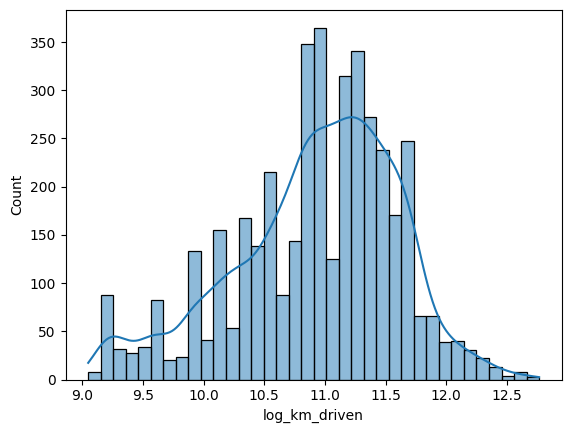

In [26]:
sns.histplot(df_filtered['log_km_driven'], kde=True)
plt.show()

In [27]:
df_filtered.drop(columns=['km_driven', 'selling_price'], inplace=True)

In [28]:
df_filtered.head()

,name,year,fuel,seller_type,transmission,owner,log_km_driven,log_selling_price
0,Maruti 800 AC,2007,Petrol,Individual,Manual,First Owner,11.156265,11.002117
1,Maruti Wagon R LXI Minor,2007,Petrol,Individual,Manual,First Owner,10.819798,11.813037
2,Hyundai Verna 1.6 SX,2012,Diesel,Individual,Manual,First Owner,11.512935,13.304687
3,Datsun RediGO T Option,2017,Petrol,Individual,Manual,First Owner,10.736418,12.429220
4,Honda Amaze VX i-DTEC,2014,Diesel,Individual,Manual,Second Owner,11.856522,13.017005


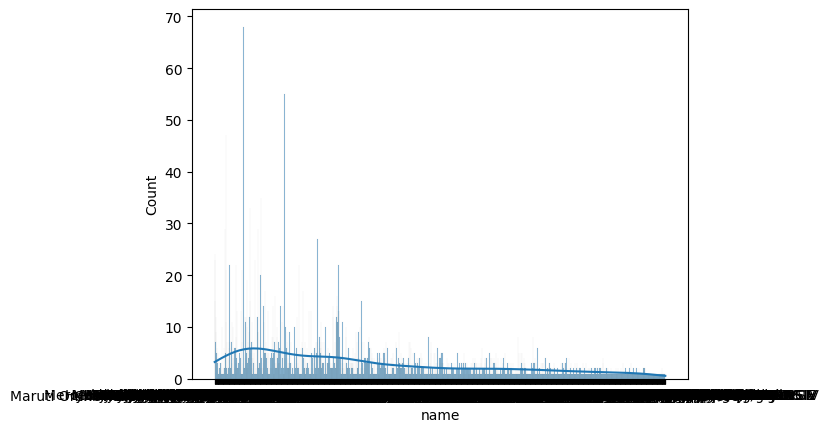

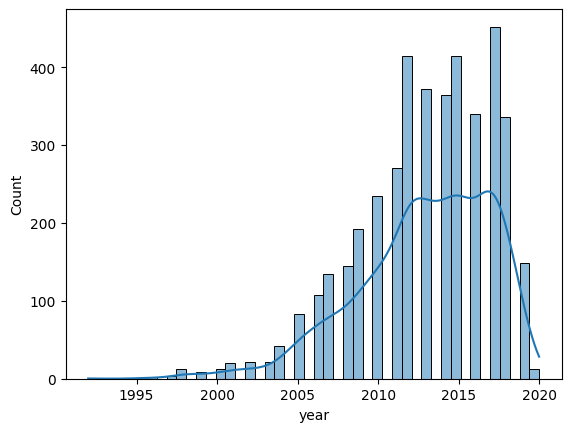

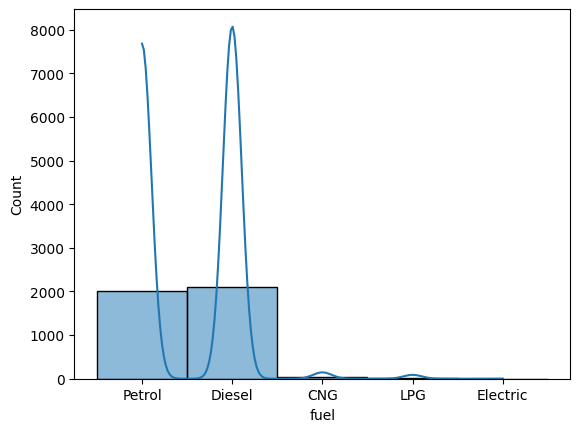

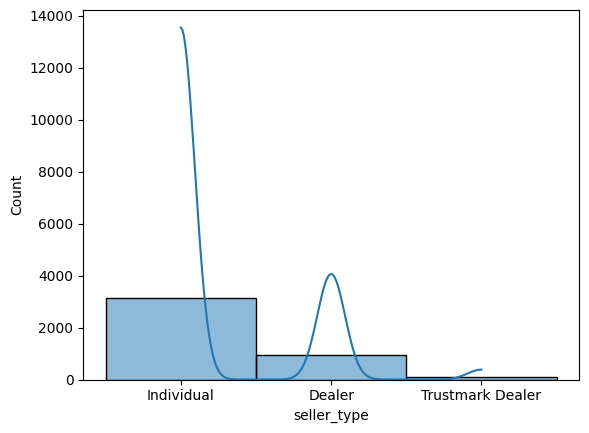

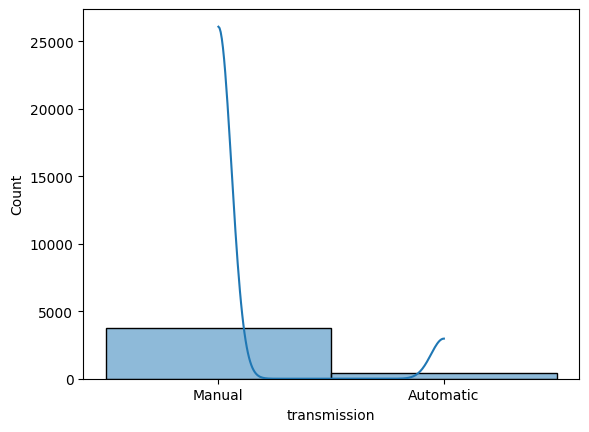

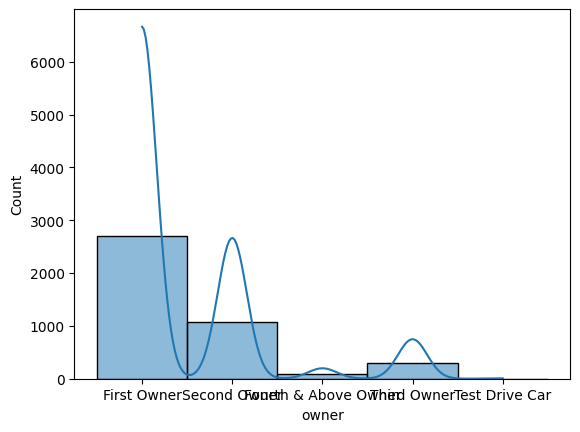

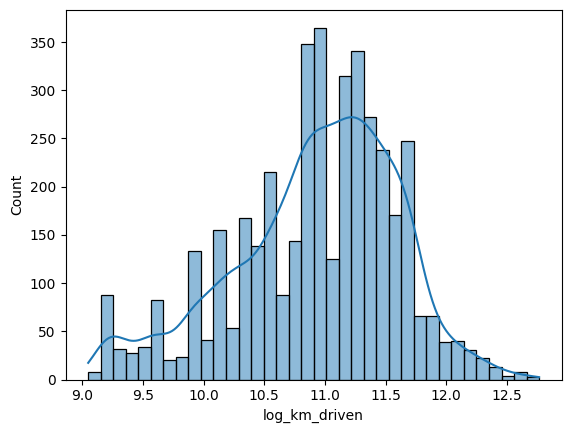

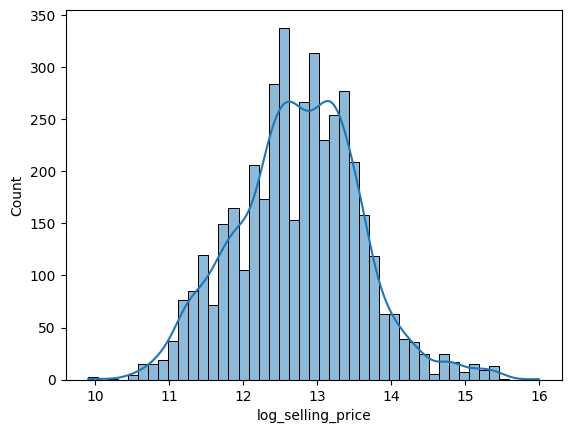

In [29]:
for column in df_filtered.columns:
    sns.histplot(df_filtered[column], kde=True)
    plt.show()

In [30]:
df_filtered=pd.get_dummies(df_filtered, columns=['transmission', 'seller_type'], drop_first=True)

In [31]:
df_filtered.head()

,name,year,fuel,owner,log_km_driven,log_selling_price,transmission_Manual,seller_type_Individual,seller_type_Trustmark Dealer
0,Maruti 800 AC,2007,Petrol,First Owner,11.156265,11.002117,True,True,False
1,Maruti Wagon R LXI Minor,2007,Petrol,First Owner,10.819798,11.813037,True,True,False
2,Hyundai Verna 1.6 SX,2012,Diesel,First Owner,11.512935,13.304687,True,True,False
3,Datsun RediGO T Option,2017,Petrol,First Owner,10.736418,12.429220,True,True,False
4,Honda Amaze VX i-DTEC,2014,Diesel,Second Owner,11.856522,13.017005,True,True,False


In [32]:
df_filtered.drop(columns=['seller_type_Trustmark Dealer'], inplace=True)

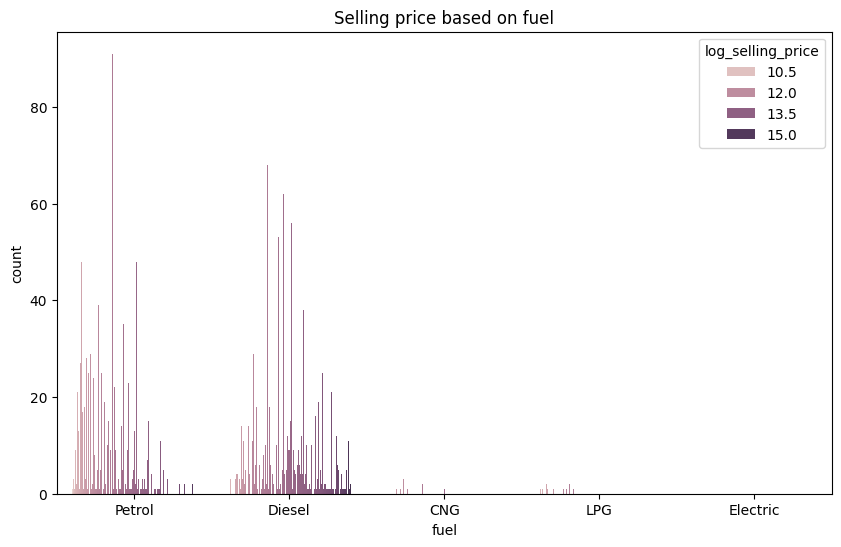

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_filtered, x='fuel', hue='log_selling_price')
plt.title('Selling price based on fuel')
plt.show()

In [34]:
df_filtered['car_age'] = 2020 - df_filtered['year'] 

In [35]:
df_filtered.head()

,name,year,fuel,owner,log_km_driven,log_selling_price,transmission_Manual,seller_type_Individual,car_age
0,Maruti 800 AC,2007,Petrol,First Owner,11.156265,11.002117,True,True,13
1,Maruti Wagon R LXI Minor,2007,Petrol,First Owner,10.819798,11.813037,True,True,13
2,Hyundai Verna 1.6 SX,2012,Diesel,First Owner,11.512935,13.304687,True,True,8
3,Datsun RediGO T Option,2017,Petrol,First Owner,10.736418,12.429220,True,True,3
4,Honda Amaze VX i-DTEC,2014,Diesel,Second Owner,11.856522,13.017005,True,True,6


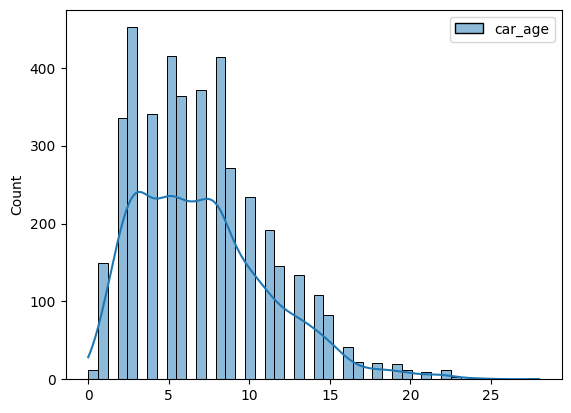

In [36]:
sns.histplot(df_filtered[['car_age']], kde=True)
plt.show()

In [37]:
fuel_count = df_filtered['fuel'].value_counts()
print(fuel_count)

fuel
Diesel      2104
Petrol      2000
CNG           38
LPG           23
Electric       1
Name: count, dtype: int64


In [38]:
df_filtered[['fuel', 'transmission_Manual']].groupby(by='fuel').sum()

,transmission_Manual
fuel,
CNG,38
Diesel,1856
Electric,0
LPG,23
Petrol,1823


In [39]:
df_age=df_filtered.copy()

In [40]:
df_age.car_age.fillna(np.mean(df_age.car_age), inplace=True)

In [41]:
df_age.car_age.isnull().sum()

0

In [42]:
df_filtered.car_age.isnull().sum()

0

<Axes: xlabel='car_age', ylabel='Count'>

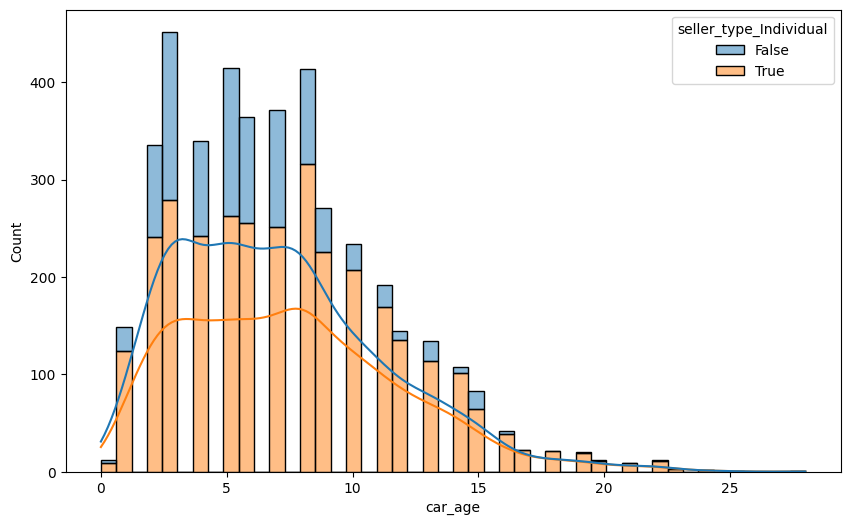

In [43]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_filtered, x='car_age', hue='seller_type_Individual', kde=True, multiple='stack')

In [44]:
methods=['linear', 'akima', 'nearest', 'quadratic']

method:linear


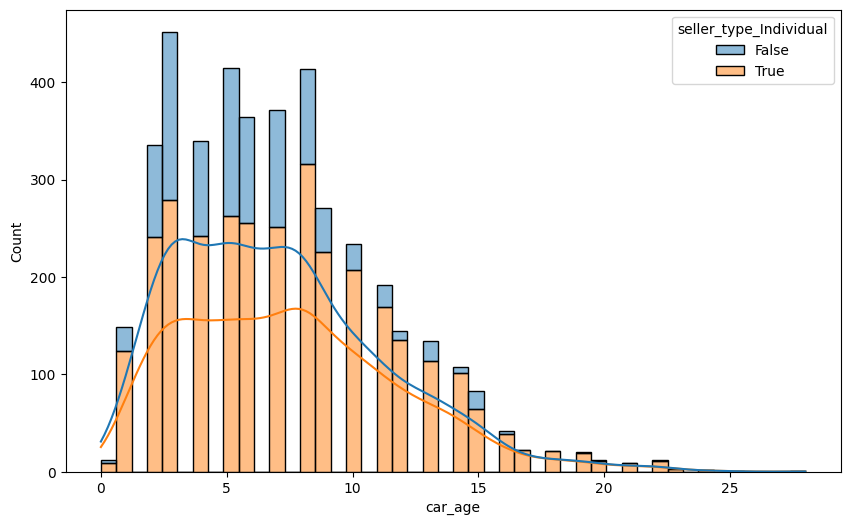

method:akima


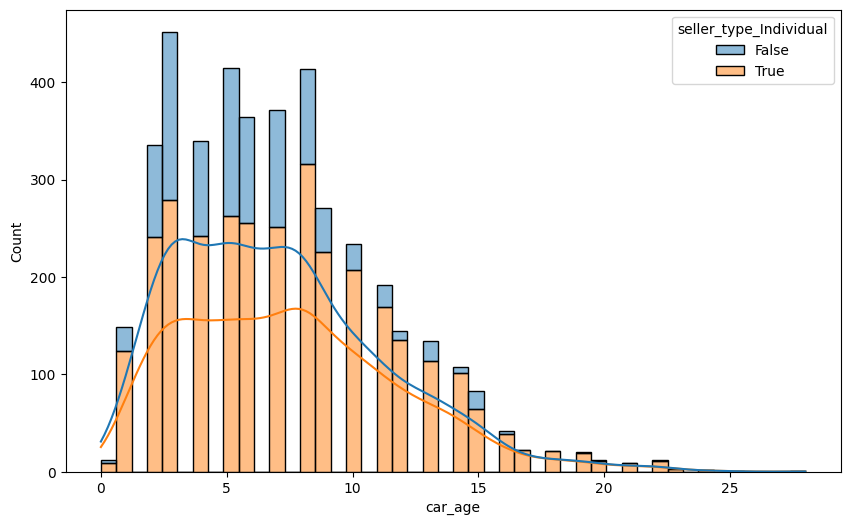

method:nearest


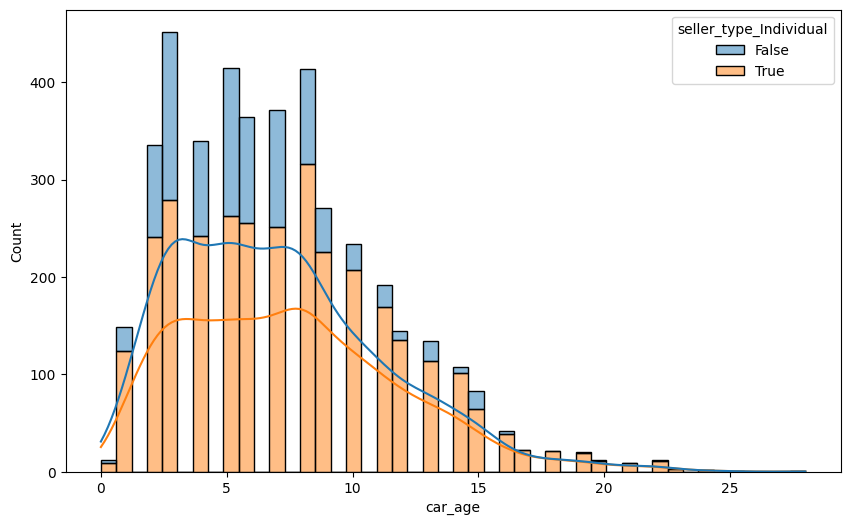

method:quadratic


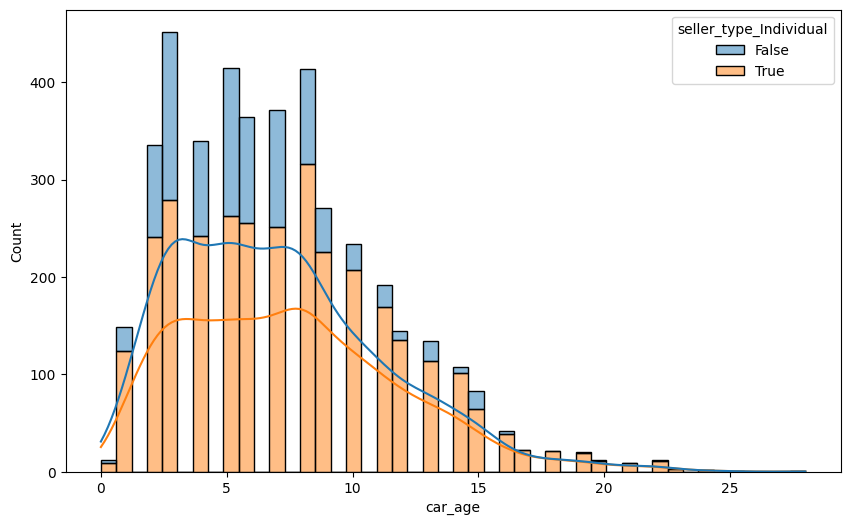

In [45]:
for i in range(len(methods)):
    plt.figure(figsize=(10,6))
    sns.histplot(data=df_filtered.interpolate(method=f'{methods[i]}'), x='car_age',hue='seller_type_Individual', kde=True, multiple='stack' )
    print(f'method:{methods[i]}')
    plt.show()

In [46]:
df_filtered.head()

,name,year,fuel,owner,log_km_driven,log_selling_price,transmission_Manual,seller_type_Individual,car_age
0,Maruti 800 AC,2007,Petrol,First Owner,11.156265,11.002117,True,True,13
1,Maruti Wagon R LXI Minor,2007,Petrol,First Owner,10.819798,11.813037,True,True,13
2,Hyundai Verna 1.6 SX,2012,Diesel,First Owner,11.512935,13.304687,True,True,8
3,Datsun RediGO T Option,2017,Petrol,First Owner,10.736418,12.429220,True,True,3
4,Honda Amaze VX i-DTEC,2014,Diesel,Second Owner,11.856522,13.017005,True,True,6


In [47]:
cross_tab=pd.crosstab(index=df_filtered['owner'], columns=df_filtered['car_age'],margins=True, margins_name='Total')
cross_tab

car_age,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,28,Total
owner,,,,,,,,,,,,,,,,,,,,,,,,,,,,
First Owner,12,142,316,414,289,319,227,260,229,124,91,76,59,41,29,33,13,7,7,5,4,1,0,1,1,0,0,2700
Fourth & Above Owner,0,0,0,1,0,1,2,5,6,4,9,10,4,9,5,2,6,3,3,1,2,3,3,0,0,0,1,80
Second Owner,0,4,18,34,46,77,121,89,148,110,102,74,52,66,51,34,15,10,6,6,4,4,6,1,1,1,0,1080
Test Drive Car,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
Third Owner,0,2,1,2,5,18,14,18,31,33,32,32,30,18,23,14,8,2,5,8,2,1,3,1,0,0,0,303
Total,12,149,336,452,340,415,364,372,414,271,234,192,145,134,108,83,42,22,21,20,12,9,12,3,2,1,1,4166


In [48]:
cross_tab_prices=pd.crosstab(index=df_filtered['log_selling_price'], columns=df_filtered['car_age'],margins=True, margins_name='Total')
cross_tab_prices

car_age,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,28,Total
log_selling_price,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9.903538,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
9.998843,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
10.308986,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
10.463132,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3
10.532123,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15.384127,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
15.414898,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11
15.520259,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [49]:
cross_tab_names=pd.crosstab(index=df_filtered['fuel'], columns=df_filtered['name'],margins=True, margins_name='Total')
cross_tab_names

name      Ambassador CLASSIC 1500 DSL AC  Ambassador Classic 2000 Dsz  \
fuel                                                                    
CNG                                    0                            0   
Diesel                                 2                            1   
Electric                               0                            0   
LPG                                    0                            0   
Petrol                                 0                            0   
Total                                  2                            1   

name      Ambassador Grand 1800 ISZ MPFI PW CL  Audi A4 1.8 TFSI  \
fuel                                                               
CNG                                          0                 0   
Diesel                                       0                 0   
Electric                                     0                 0   
LPG                                          0                 0   
Petrol                                       1                 1   
Total                                        1                 1   

name      Audi A4 2.0 TDI  Audi A4 2.0 TDI 177 Bhp Premium Plus  \
fuel                                                              
CNG                     0                                     0   
Diesel                  1                                     2   
Electric                0                                     0   
LPG                     0                                     0   
Petrol                  0                                     0   
Total                   1                                     2   

name      Audi A4 3.0 TDI Quattro  Audi A4 30 TFSI Technology  \
fuel                                                            
CNG                             0                           0   
Diesel                         12                           0   
Electric                        0                           0   
LPG                             0                           0   
Petrol                          0                           2   
Total                          12                           2   

name      Audi A4 35 TDI Premium  Audi A4 35 TDI Premium Plus  \
fuel                                                            
CNG                            0                            0   
Diesel                         1                            1   
Electric                       0                            0   
LPG                            0                            0   
Petrol                         0                            0   
Total                          1                            1   

name      Audi A4 New  2.0 TDI Multitronic  Audi A6 2.0 TDI  Design Edition  \
fuel                                                                          
CNG                                      0                                0   
Diesel                                   1                                3   
Electric                                 0                                0   
LPG                                      0                                0   
Petrol                                   0                                0   
Total                                    1                                3   

name      Audi A6 2.0 TDI Premium Plus  Audi A6 2.7 TDI  Audi A6 2.8 FSI  \
fuel                                                                       
CNG                                  0                0                0   
Diesel                              13                1                0   
Electric                             0                0                0   
LPG                                  0                0                0   
Petrol                               0                0                1   
Total                               13                1                1   

name      Audi A8 4.2 TDI  Audi A8 L 3.0 TDI quat

In [56]:
cross_tab_names=pd.crosstab(index=df_filtered['fuel'], columns=df_filtered['brand'],margins=True, margins_name='Total')
cross_tab_names

brand,ambassador,audi,bmw,chevrolet,daewoo,datsun,fiat,force,ford,honda,hyundai,isuzu,jaguar,jeep,kia,land,mahindra,maruti,mercedes-benz,mg,mitsubishi,nissan,opelcorsa,renault,skoda,tata,toyota,volkswagen,volvo,Total
fuel,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CNG,0,0,0,1,0,0,0,0,0,0,8,0,0,0,0,0,0,28,0,0,0,0,0,0,0,1,0,0,0,38
Diesel,3,51,38,95,0,0,27,1,157,97,238,1,3,2,1,4,343,378,28,1,5,43,0,65,52,231,163,73,4,2104
Electric,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
LPG,0,0,0,1,0,0,0,0,0,0,8,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,23
Petrol,1,8,1,89,1,34,9,0,58,147,532,0,3,1,0,1,14,806,6,1,1,20,2,64,15,116,38,32,0,2000
Total,4,59,39,186,1,34,36,1,215,244,786,1,6,3,1,5,357,1226,34,2,6,63,2,129,67,348,202,105,4,4166


In [51]:
df_filtered['name'].value_counts()

name
Maruti Swift Dzire VDI           68
Maruti Alto 800 LXI              55
Maruti Alto LXi                  47
Maruti Alto LX                   35
Hyundai EON Era Plus             33
                                 ..
Maruti Swift VDi BSIII W/ ABS     1
Hyundai Accent GLE 1              1
Mahindra XUV500 W11 AT BSIV       1
Tata Indigo CS eLX BS IV          1
Hyundai i20 Magna 1.4 CRDi        1
Name: count, Length: 1438, dtype: int64

In [52]:
car_brands=df_filtered['name'].unique()
car_brands

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

In [53]:
df_filtered['name']=df_filtered['name'].str.lower()

In [54]:
df_filtered['brand']=df_filtered['name'].str.split().str[0]
brands=df_filtered['brand'].unique()
print(brands)

['maruti' 'hyundai' 'datsun' 'honda' 'tata' 'chevrolet' 'toyota' 'jaguar'
 'mercedes-benz' 'audi' 'skoda' 'jeep' 'bmw' 'mahindra' 'ford' 'nissan'
 'renault' 'fiat' 'volkswagen' 'volvo' 'mitsubishi' 'land' 'daewoo' 'mg'
 'force' 'isuzu' 'opelcorsa' 'ambassador' 'kia']


In [55]:
df_filtered.head()

,name,year,fuel,owner,log_km_driven,log_selling_price,transmission_Manual,seller_type_Individual,car_age,brand
0,maruti 800 ac,2007,Petrol,First Owner,11.156265,11.002117,True,True,13,maruti
1,maruti wagon r lxi minor,2007,Petrol,First Owner,10.819798,11.813037,True,True,13,maruti
2,hyundai verna 1.6 sx,2012,Diesel,First Owner,11.512935,13.304687,True,True,8,hyundai
3,datsun redigo t option,2017,Petrol,First Owner,10.736418,12.429220,True,True,3,datsun
4,honda amaze vx i-dtec,2014,Diesel,Second Owner,11.856522,13.017005,True,True,6,honda


In [58]:
cross_tab_brands=pd.crosstab(index=df_filtered['transmission_Manual'], columns=df_filtered['brand'],margins=True, margins_name='Total')
cross_tab_brands

brand,ambassador,audi,bmw,chevrolet,daewoo,datsun,fiat,force,ford,honda,hyundai,isuzu,jaguar,jeep,kia,land,mahindra,maruti,mercedes-benz,mg,mitsubishi,nissan,opelcorsa,renault,skoda,tata,toyota,volkswagen,volvo,Total
transmission_Manual,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,0,59,39,5,0,2,0,0,17,25,70,0,6,0,1,5,20,48,32,1,1,1,0,3,25,7,34,21,4,426
True,4,0,0,181,1,32,36,1,198,219,716,1,0,3,0,0,337,1178,2,1,5,62,2,126,42,341,168,84,0,3740
Total,4,59,39,186,1,34,36,1,215,244,786,1,6,3,1,5,357,1226,34,2,6,63,2,129,67,348,202,105,4,4166


In [59]:
cross_tab_value_brands=pd.crosstab(index=df_filtered['log_selling_price'], columns=df_filtered['brand'],margins=True, margins_name='Total')
cross_tab_value_brands

brand,ambassador,audi,bmw,chevrolet,daewoo,datsun,fiat,force,ford,honda,hyundai,isuzu,jaguar,jeep,kia,land,mahindra,maruti,mercedes-benz,mg,mitsubishi,nissan,opelcorsa,renault,skoda,tata,toyota,volkswagen,volvo,Total
log_selling_price,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9.903538,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9.998843,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10.308986,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
10.463132,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,3
10.532123,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15.384127,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
15.414898,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11
15.520259,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [60]:
mean_selling_price_age = df_filtered.groupby('car_age')['log_selling_price'].mean().reset_index(drop=True)

In [61]:
mean_selling_price_age

0     13.321864
1     13.622517
2     13.489860
3     13.340911
4     13.121719
5     13.036613
6     12.961306
7     12.855365
8     12.620248
9     12.411815
10    12.264658
11    12.155376
12    11.911333
13    11.812244
14    11.702196
15    11.494746
16    11.556526
17    11.280485
18    11.342487
19    11.363014
20    11.177787
21    11.027386
22    11.392866
23    11.338470
24    12.317649
25    11.461643
26    10.819798
Name: log_selling_price, dtype: float64

In [62]:
mean_selling_price_brand = df_filtered.groupby('brand')['log_selling_price'].mean().reset_index()
mean_selling_price_brand

,brand,log_selling_price
0,ambassador,11.795463
1,audi,14.337884
2,bmw,14.713816
3,chevrolet,12.219806
4,daewoo,11.002117
5,datsun,12.552962
6,fiat,12.357978
7,force,12.754197
8,ford,12.893990
9,honda,13.035721


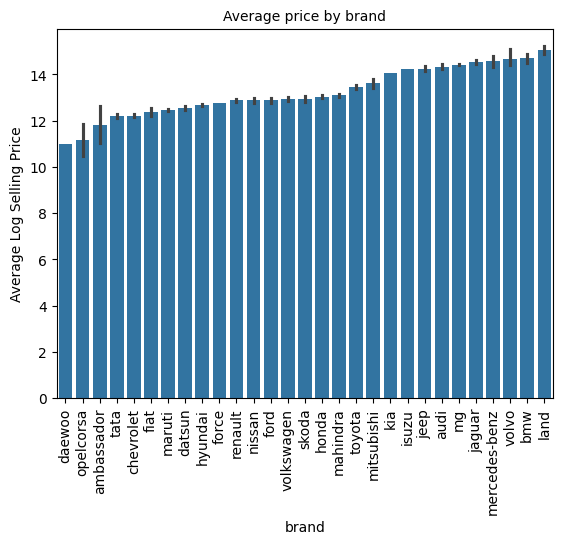

In [63]:
sns.barplot(x='brand', y='log_selling_price', data=df_filtered, order=df_filtered.groupby('brand')['log_selling_price'].mean().sort_values().index)
plt.ylabel("Average Log Selling Price")
plt.xticks(rotation=90)
plt.title("Average price by brand", size=10);

In [64]:
df_filtered.head()

,name,year,fuel,owner,log_km_driven,log_selling_price,transmission_Manual,seller_type_Individual,car_age,brand
0,maruti 800 ac,2007,Petrol,First Owner,11.156265,11.002117,True,True,13,maruti
1,maruti wagon r lxi minor,2007,Petrol,First Owner,10.819798,11.813037,True,True,13,maruti
2,hyundai verna 1.6 sx,2012,Diesel,First Owner,11.512935,13.304687,True,True,8,hyundai
3,datsun redigo t option,2017,Petrol,First Owner,10.736418,12.429220,True,True,3,datsun
4,honda amaze vx i-dtec,2014,Diesel,Second Owner,11.856522,13.017005,True,True,6,honda


In [65]:
df_normalized=df_filtered.copy()

In [66]:
df_normalized.head()

,name,year,fuel,owner,log_km_driven,log_selling_price,transmission_Manual,seller_type_Individual,car_age,brand
0,maruti 800 ac,2007,Petrol,First Owner,11.156265,11.002117,True,True,13,maruti
1,maruti wagon r lxi minor,2007,Petrol,First Owner,10.819798,11.813037,True,True,13,maruti
2,hyundai verna 1.6 sx,2012,Diesel,First Owner,11.512935,13.304687,True,True,8,hyundai
3,datsun redigo t option,2017,Petrol,First Owner,10.736418,12.429220,True,True,3,datsun
4,honda amaze vx i-dtec,2014,Diesel,Second Owner,11.856522,13.017005,True,True,6,honda


In [67]:
df_normalized.drop(columns=['name', 'year'], inplace=True)

In [68]:
df_normalized.head()

,fuel,owner,log_km_driven,log_selling_price,transmission_Manual,seller_type_Individual,car_age,brand
0,Petrol,First Owner,11.156265,11.002117,True,True,13,maruti
1,Petrol,First Owner,10.819798,11.813037,True,True,13,maruti
2,Diesel,First Owner,11.512935,13.304687,True,True,8,hyundai
3,Petrol,First Owner,10.736418,12.429220,True,True,3,datsun
4,Diesel,Second Owner,11.856522,13.017005,True,True,6,honda


In [69]:
df_normalized.dtypes

fuel                       object
owner                      object
log_km_driven             float64
log_selling_price         float64
transmission_Manual          bool
seller_type_Individual       bool
car_age                     int64
brand                      object
dtype: object

In [70]:
df_numerical= df_normalized.select_dtypes(include=['number'])

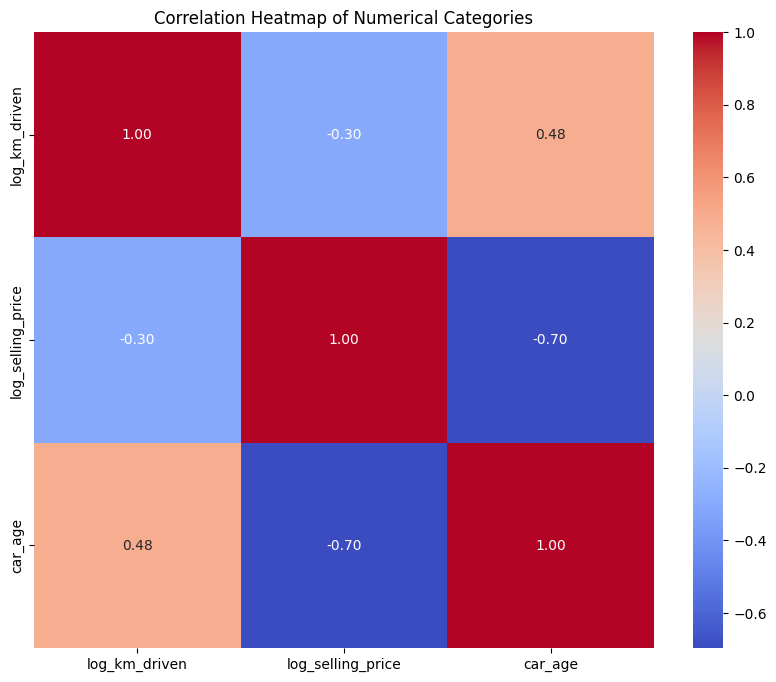

In [71]:
correlation_matrix = df_numerical.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Categories')
plt.show()

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X=df_normalized.drop("log_selling_price", axis=1)
Y=df_normalized["log_selling_price"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [74]:
X

,fuel,owner,log_km_driven,transmission_Manual,seller_type_Individual,car_age,brand
0,Petrol,First Owner,11.156265,True,True,13,maruti
1,Petrol,First Owner,10.819798,True,True,13,maruti
2,Diesel,First Owner,11.512935,True,True,8,hyundai
3,Petrol,First Owner,10.736418,True,True,3,datsun
4,Diesel,Second Owner,11.856522,True,True,6,honda
...,...,...,...,...,...,...,...
4335,Diesel,Second Owner,11.289794,True,True,6,hyundai
4336,Diesel,Second Owner,11.289794,True,True,6,hyundai
4337,Petrol,Second Owner,11.326608,True,True,11,maruti
4338,Diesel,First Owner,11.407576,True,True,4,hyundai


In [75]:
X[['transmission_Manual', 'seller_type_Individual']]=X[['transmission_Manual', 'seller_type_Individual']].astype(int)

In [76]:
X

,fuel,owner,log_km_driven,transmission_Manual,seller_type_Individual,car_age,brand
0,Petrol,First Owner,11.156265,1,1,13,maruti
1,Petrol,First Owner,10.819798,1,1,13,maruti
2,Diesel,First Owner,11.512935,1,1,8,hyundai
3,Petrol,First Owner,10.736418,1,1,3,datsun
4,Diesel,Second Owner,11.856522,1,1,6,honda
...,...,...,...,...,...,...,...
4335,Diesel,Second Owner,11.289794,1,1,6,hyundai
4336,Diesel,Second Owner,11.289794,1,1,6,hyundai
4337,Petrol,Second Owner,11.326608,1,1,11,maruti
4338,Diesel,First Owner,11.407576,1,1,4,hyundai


In [77]:
X=pd.get_dummies(df_normalized, columns=['fuel', 'owner', 'brand'], drop_first=True)

In [78]:
X

,log_km_driven,log_selling_price,transmission_Manual,seller_type_Individual,car_age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,brand_audi,brand_bmw,brand_chevrolet,brand_daewoo,brand_datsun,brand_fiat,brand_force,brand_ford,brand_honda,brand_hyundai,brand_isuzu,brand_jaguar,brand_jeep,brand_kia,brand_land,brand_mahindra,brand_maruti,brand_mercedes-benz,brand_mg,brand_mitsubishi,brand_nissan,brand_opelcorsa,brand_renault,brand_skoda,brand_tata,brand_toyota,brand_volkswagen,brand_volvo
0,11.156265,11.002117,True,True,13,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,10.819798,11.813037,True,True,13,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,11.512935,13.304687,True,True,8,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,10.736418,12.429220,True,True,3,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,11.856522,13.017005,True,True,6,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,11.289794,12.923912,True,True,6,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4336,11.289794,12.923912,True,True,6,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4337,11.326608,11.608245,True,True,11,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4338,11.407576,13.670486,True,True,4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [79]:
X[['transmission_Manual',
   'seller_type_Individual',
   'fuel_Diesel',
   'fuel_Electric',
   'fuel_LPG',
   'fuel_Petrol',
   'owner_Fourth & Above Owner',
   'owner_Second Owner',
   'owner_Test Drive Car',
   'owner_Third Owner',
   'brand_audi',
   'brand_bmw',
   'brand_chevrolet',
   'brand_daewoo',
   'brand_datsun',
   'brand_fiat',
   'brand_force',
   'brand_ford',
   'brand_honda',
   'brand_hyundai',	
   'brand_isuzu',
   'brand_jaguar',
   'brand_jeep',
   'brand_kia',
   'brand_land',
   'brand_mahindra',
   'brand_maruti',
   'brand_mercedes-benz',
   'brand_mg',
   'brand_mitsubishi',
   'brand_nissan',
   'brand_opelcorsa',
   'brand_renault',
   'brand_skoda',
   'brand_tata',
   'brand_toyota',
   'brand_volkswagen',
   'brand_volvo']]=X[['transmission_Manual',
   'seller_type_Individual',
   'fuel_Diesel',
   'fuel_Electric',
   'fuel_LPG',
   'fuel_Petrol',
   'owner_Fourth & Above Owner',
   'owner_Second Owner',
   'owner_Test Drive Car',
   'owner_Third Owner',
   'brand_audi',
   'brand_bmw',
   'brand_chevrolet',
   'brand_daewoo',
   'brand_datsun',
   'brand_fiat',
   'brand_force',
   'brand_ford',
   'brand_honda',
   'brand_hyundai',	
   'brand_isuzu',
   'brand_jaguar',
   'brand_jeep',
   'brand_kia',
   'brand_land',
   'brand_mahindra',
   'brand_maruti',
   'brand_mercedes-benz',
   'brand_mg',
   'brand_mitsubishi',
   'brand_nissan',
   'brand_opelcorsa',
   'brand_renault',
   'brand_skoda',
   'brand_tata',
   'brand_toyota',
   'brand_volkswagen',
   'brand_volvo']].astype(int)

In [80]:
X

,log_km_driven,log_selling_price,transmission_Manual,seller_type_Individual,car_age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,brand_audi,brand_bmw,brand_chevrolet,brand_daewoo,brand_datsun,brand_fiat,brand_force,brand_ford,brand_honda,brand_hyundai,brand_isuzu,brand_jaguar,brand_jeep,brand_kia,brand_land,brand_mahindra,brand_maruti,brand_mercedes-benz,brand_mg,brand_mitsubishi,brand_nissan,brand_opelcorsa,brand_renault,brand_skoda,brand_tata,brand_toyota,brand_volkswagen,brand_volvo
0,11.156265,11.002117,1,1,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,10.819798,11.813037,1,1,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,11.512935,13.304687,1,1,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10.736418,12.429220,1,1,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,11.856522,13.017005,1,1,6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,11.289794,12.923912,1,1,6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4336,11.289794,12.923912,1,1,6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4337,11.326608,11.608245,1,1,11,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4338,11.407576,13.670486,1,1,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [82]:
X.columns = [col.replace('brand_', '') if col.startswith('brand_') else col for col in X.columns]

In [83]:
X

,log_km_driven,log_selling_price,transmission_Manual,seller_type_Individual,car_age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,audi,bmw,chevrolet,daewoo,datsun,fiat,force,ford,honda,hyundai,isuzu,jaguar,jeep,kia,land,mahindra,maruti,mercedes-benz,mg,mitsubishi,nissan,opelcorsa,renault,skoda,tata,toyota,volkswagen,volvo
0,11.156265,11.002117,1,1,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,10.819798,11.813037,1,1,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,11.512935,13.304687,1,1,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10.736418,12.429220,1,1,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,11.856522,13.017005,1,1,6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,11.289794,12.923912,1,1,6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4336,11.289794,12.923912,1,1,6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4337,11.326608,11.608245,1,1,11,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4338,11.407576,13.670486,1,1,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [84]:
Y

0       11.002117
1       11.813037
2       13.304687
3       12.429220
4       13.017005
          ...    
4335    12.923912
4336    12.923912
4337    11.608245
4338    13.670486
4339    12.323860
Name: log_selling_price, Length: 4166, dtype: float64

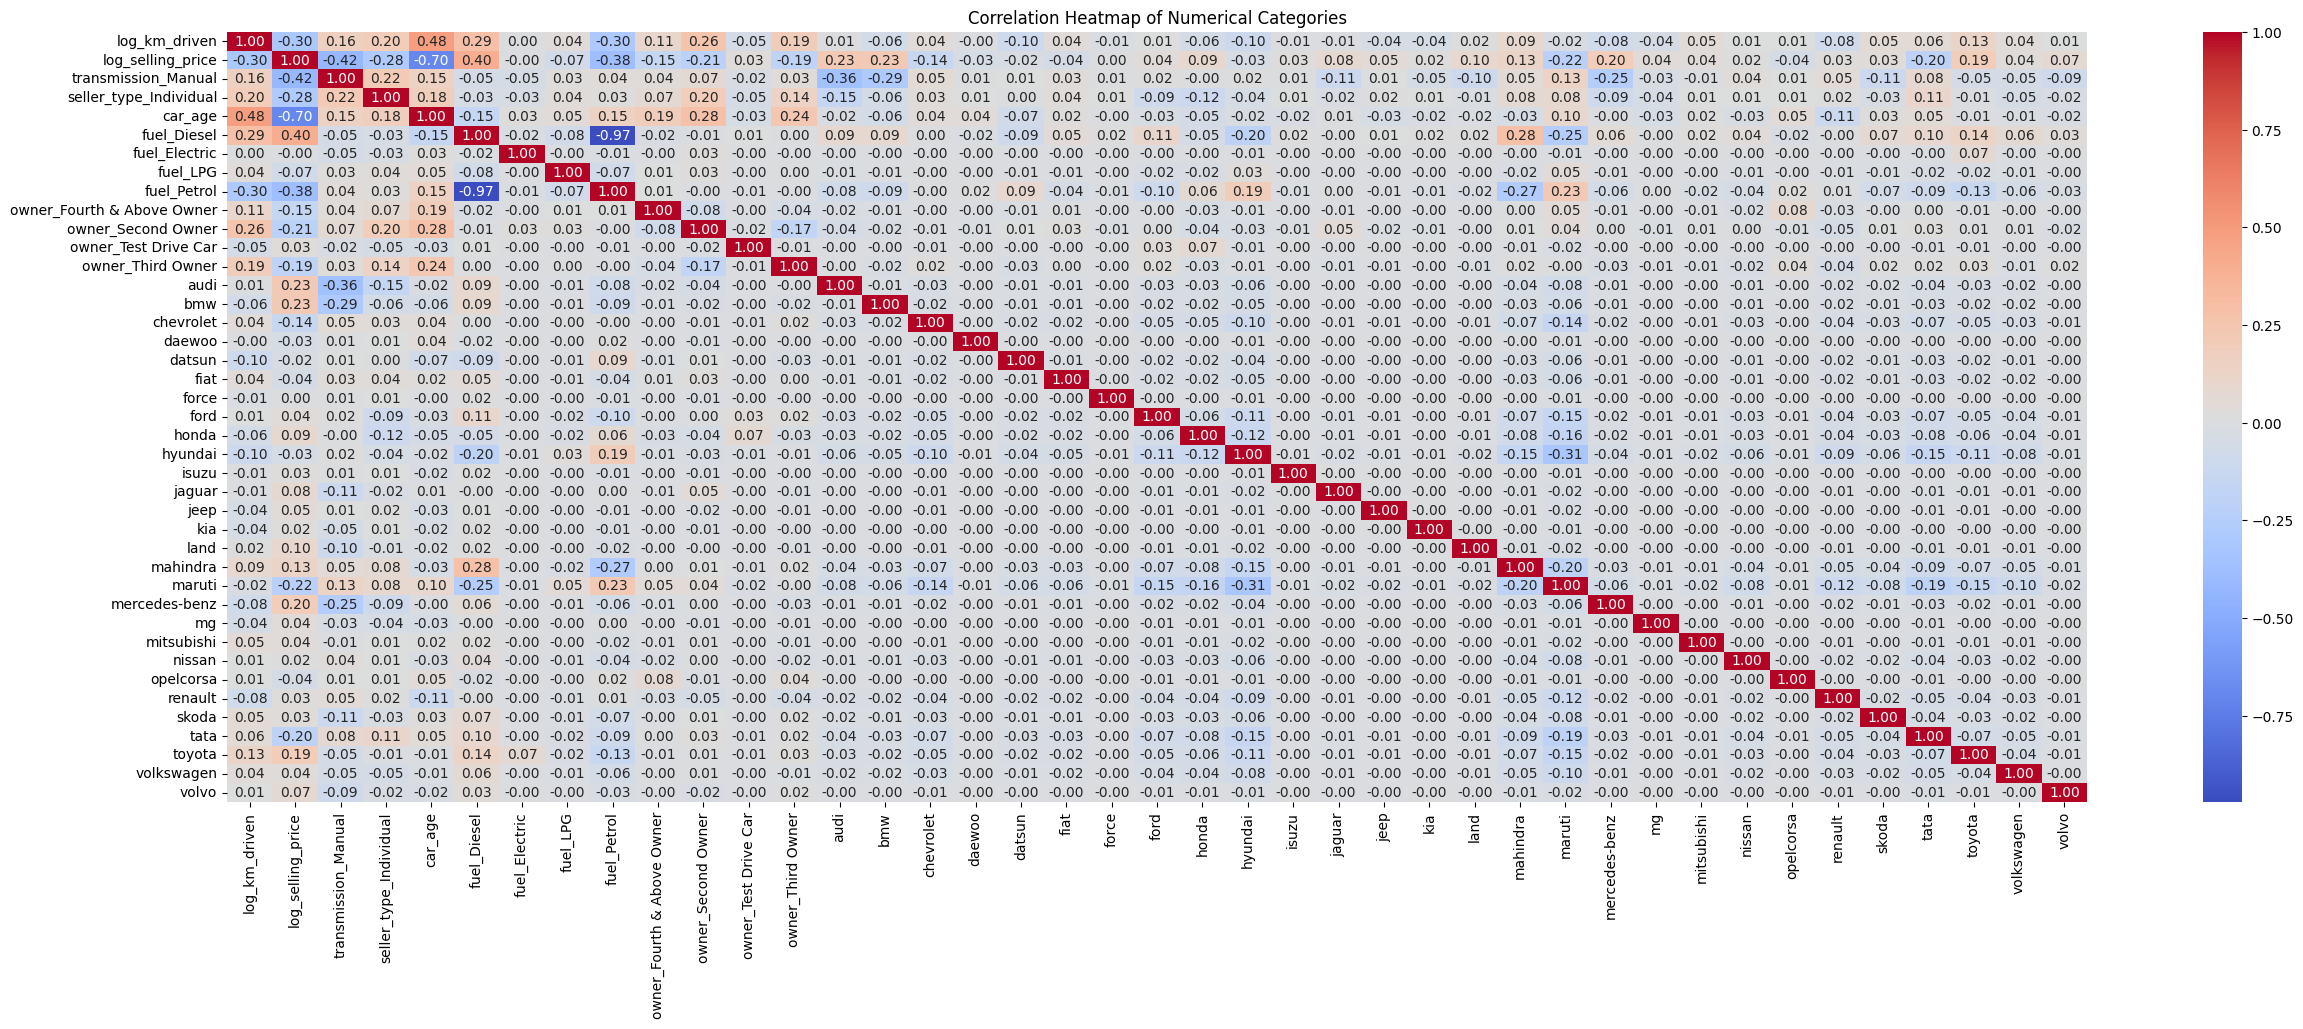

In [85]:
correlation_matrix = X.corr()

plt.figure(figsize=(30,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Categories')
plt.show()

In [86]:
#VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

variables=X.copy()
#variables.drop(columns=["Survived"], inplace=True)
vif_data = pd.DataFrame()
vif_data["Variable"] = variables.columns
vif_data["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

# Visualizamos los resultados del VIF
print(vif_data)

                      Variable         VIF
0                log_km_driven  383.350955
1            log_selling_price  583.667363
2          transmission_Manual   16.062093
3       seller_type_Individual    4.919793
4                      car_age   10.757067
5                  fuel_Diesel   58.056055
6                fuel_Electric    1.036392
7                     fuel_LPG    1.587790
8                  fuel_Petrol   52.189787
9   owner_Fourth & Above Owner    1.123571
10          owner_Second Owner    1.743672
11        owner_Test Drive Car    1.010587
12           owner_Third Owner    1.309044
13                        audi   12.223072
14                         bmw    8.385740
15                   chevrolet   31.424350
16                      daewoo    1.163741
17                      datsun    6.517427
18                        fiat    6.938388
19                       force    1.161566
20                        ford   37.389031
21                       honda   43.305875
22         

In [87]:
X

,log_km_driven,log_selling_price,transmission_Manual,seller_type_Individual,car_age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,audi,bmw,chevrolet,daewoo,datsun,fiat,force,ford,honda,hyundai,isuzu,jaguar,jeep,kia,land,mahindra,maruti,mercedes-benz,mg,mitsubishi,nissan,opelcorsa,renault,skoda,tata,toyota,volkswagen,volvo
0,11.156265,11.002117,1,1,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,10.819798,11.813037,1,1,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,11.512935,13.304687,1,1,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10.736418,12.429220,1,1,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,11.856522,13.017005,1,1,6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,11.289794,12.923912,1,1,6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4336,11.289794,12.923912,1,1,6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4337,11.326608,11.608245,1,1,11,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4338,11.407576,13.670486,1,1,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [88]:
x_train, x_test, y_train, y_test= train_test_split(X, Y, train_size=0.8, random_state=42)

In [89]:
lm=linear_model.LinearRegression()
model=lm.fit(x_train, y_train)

In [90]:
predictions=lm.predict(x_test)

In [91]:
r2=r2_score(y_test, predictions)
print(r2)

1.0


In [92]:
X

,log_km_driven,log_selling_price,transmission_Manual,seller_type_Individual,car_age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,audi,bmw,chevrolet,daewoo,datsun,fiat,force,ford,honda,hyundai,isuzu,jaguar,jeep,kia,land,mahindra,maruti,mercedes-benz,mg,mitsubishi,nissan,opelcorsa,renault,skoda,tata,toyota,volkswagen,volvo
0,11.156265,11.002117,1,1,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,10.819798,11.813037,1,1,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,11.512935,13.304687,1,1,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10.736418,12.429220,1,1,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,11.856522,13.017005,1,1,6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,11.289794,12.923912,1,1,6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4336,11.289794,12.923912,1,1,6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4337,11.326608,11.608245,1,1,11,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4338,11.407576,13.670486,1,1,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [93]:
X=df_normalized.copy()

In [94]:
X

,fuel,owner,log_km_driven,log_selling_price,transmission_Manual,seller_type_Individual,car_age,brand
0,Petrol,First Owner,11.156265,11.002117,True,True,13,maruti
1,Petrol,First Owner,10.819798,11.813037,True,True,13,maruti
2,Diesel,First Owner,11.512935,13.304687,True,True,8,hyundai
3,Petrol,First Owner,10.736418,12.429220,True,True,3,datsun
4,Diesel,Second Owner,11.856522,13.017005,True,True,6,honda
...,...,...,...,...,...,...,...,...
4335,Diesel,Second Owner,11.289794,12.923912,True,True,6,hyundai
4336,Diesel,Second Owner,11.289794,12.923912,True,True,6,hyundai
4337,Petrol,Second Owner,11.326608,11.608245,True,True,11,maruti
4338,Diesel,First Owner,11.407576,13.670486,True,True,4,hyundai


In [95]:
X.drop(columns=['brand'], inplace=True)

In [96]:
X=pd.get_dummies(df_normalized, columns=['fuel'], drop_first=True)

In [97]:
X.head()

,owner,log_km_driven,log_selling_price,transmission_Manual,seller_type_Individual,car_age,brand,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol
0,First Owner,11.156265,11.002117,True,True,13,maruti,False,False,False,True
1,First Owner,10.819798,11.813037,True,True,13,maruti,False,False,False,True
2,First Owner,11.512935,13.304687,True,True,8,hyundai,True,False,False,False
3,First Owner,10.736418,12.429220,True,True,3,datsun,False,False,False,True
4,Second Owner,11.856522,13.017005,True,True,6,honda,True,False,False,False


In [98]:
X[['transmission_Manual','seller_type_Individual', 'fuel_Diesel','fuel_Electric', 'fuel_LPG', 'fuel_Petrol']]=X[['transmission_Manual','seller_type_Individual', 'fuel_Diesel', 'fuel_Electric', 'fuel_LPG', 'fuel_Petrol']].astype(int)

In [99]:
X

,owner,log_km_driven,log_selling_price,transmission_Manual,seller_type_Individual,car_age,brand,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol
0,First Owner,11.156265,11.002117,1,1,13,maruti,0,0,0,1
1,First Owner,10.819798,11.813037,1,1,13,maruti,0,0,0,1
2,First Owner,11.512935,13.304687,1,1,8,hyundai,1,0,0,0
3,First Owner,10.736418,12.429220,1,1,3,datsun,0,0,0,1
4,Second Owner,11.856522,13.017005,1,1,6,honda,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4335,Second Owner,11.289794,12.923912,1,1,6,hyundai,1,0,0,0
4336,Second Owner,11.289794,12.923912,1,1,6,hyundai,1,0,0,0
4337,Second Owner,11.326608,11.608245,1,1,11,maruti,0,0,0,1
4338,First Owner,11.407576,13.670486,1,1,4,hyundai,1,0,0,0


In [101]:
new_df=X.copy()

In [103]:
X

,owner,log_km_driven,transmission_Manual,seller_type_Individual,car_age,brand,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol
0,First Owner,11.156265,1,1,13,maruti,0,0,0,1
1,First Owner,10.819798,1,1,13,maruti,0,0,0,1
2,First Owner,11.512935,1,1,8,hyundai,1,0,0,0
3,First Owner,10.736418,1,1,3,datsun,0,0,0,1
4,Second Owner,11.856522,1,1,6,honda,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4335,Second Owner,11.289794,1,1,6,hyundai,1,0,0,0
4336,Second Owner,11.289794,1,1,6,hyundai,1,0,0,0
4337,Second Owner,11.326608,1,1,11,maruti,0,0,0,1
4338,First Owner,11.407576,1,1,4,hyundai,1,0,0,0


In [109]:
X.drop(columns=['brand'], inplace=True)

In [102]:
new_df.columns

Index(['owner', 'log_km_driven', 'transmission_Manual',
       'seller_type_Individual', 'car_age', 'brand', 'fuel_Diesel',
       'fuel_Electric', 'fuel_LPG', 'fuel_Petrol'],
      dtype='object')

In [110]:
x_train, x_test, y_train, y_test= train_test_split(X, Y, train_size=0.8, random_state=42)

In [111]:
lm=linear_model.LinearRegression()
model=lm.fit(x_train, y_train)

In [112]:
predictions=lm.predict(x_test)

In [113]:
r2=r2_score(y_test, predictions)
print(r2)

0.7040146852118285


#### This means I made a great model ;)

In [114]:
mse= mean_squared_error(y_test, predictions)
print(mse)

0.20959057848376572


In [117]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.api as sm

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [119]:
X= sm.add_constant(X)

model=sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      log_selling_price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     1131.
Date:                Fri, 10 Jan 2025   Prob (F-statistic):               0.00
Time:                        21:04:20   Log-Likelihood:                -2777.2
No. Observations:                4166   AIC:                             5572.
Df Residuals:                    4157   BIC:                             5629.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     14

In [122]:
df_normalized.head()

,fuel,owner,log_km_driven,log_selling_price,transmission_Manual,seller_type_Individual,car_age,brand
0,Petrol,First Owner,11.156265,11.002117,True,True,13,maruti
1,Petrol,First Owner,10.819798,11.813037,True,True,13,maruti
2,Diesel,First Owner,11.512935,13.304687,True,True,8,hyundai
3,Petrol,First Owner,10.736418,12.429220,True,True,3,datsun
4,Diesel,Second Owner,11.856522,13.017005,True,True,6,honda


## Let's make a prediction --> we want to know how  much our car is worth
##### KM driven
##### transnission Manual
##### Seller type Individual
##### Car age
##### Fuel Diesel
##### Fuel Electric
##### Fuel LPG
##### Fuel Petrol

In [137]:
VW_71=[[1, 80.70000,1,1, 25, 0, 0, 0, 1,]]
#1 inicial es la variable constante (realmente solo tenemos 8 atributos)

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X_train, y_train)

score = model2.score(X_test, y_test)
print(f"R² Score: {score}")

R² Score: 0.7040146852118285


In [143]:
VW_71_predicted=model2.predict(VW_71)

print(f"Predicted Selling Price: {VW_71_predicted[0]}")

Predicted Selling Price: 4.531738723320654


In [142]:
Skoda_2020=[[1, 100.65,0,0, 0, 1, 0, 0, 0]]
Skoda_2020_predicted=model2.predict(Skoda_2020)

print(f"Predicted Selling Price: {Skoda_2020_predicted[0]}")


Predicted Selling Price: 7.190451625546567
